In [1]:
#Load packages
from arcgis import GIS
import pandas as pd

In [2]:
#Create GIS object
gis = GIS()

### Load data into spatial dataframes

In [2]:
#Load needs data
fname_needs = '../Data/raw/Basic_Data/1_Conservation_Need.shp'
sdfNeeds = pd.DataFrame.spatial.from_featureclass(fname_needs)

In [3]:
#Load opportunity data
fname_opportunity = '../Data/raw/Basic_Data/5_Combined_Opportunity.shp'
sdfOpps = pd.DataFrame.spatial.from_featureclass(fname_opportunity)

In [4]:
#Load hexagon data
fname_hex = '../scratch/Hexagons_from_R.shp'
sdfHex = pd.DataFrame.spatial.from_featureclass(fname_hex)

#### Plots

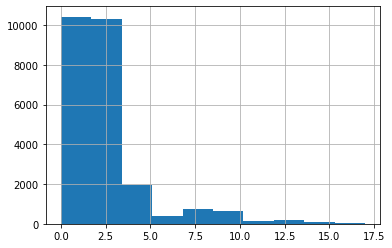

In [6]:
sdfHex.NeedTotal.hist()

### Extract information

In [52]:
#Create a list of users and print them
all_users =sdfNeeds['USER_NAME'].unique()
all_users

array(['Dr. Christian Reiss', 'Dr. Dirk Welsford', 'Grant Humphries',
       'Javier Arata', 'Dr. Heather Lynch', 'Philiip Trathan',
       'Dr. Susie Grant', 'Dr. Katherine Teschke', 'Pål Skogrand',
       'Bettina Meyer', 'So Kawaguhi', 'Chris Johnson', 'Jefferson Hinke',
       'Dr. Cassandra Brooks', 'Claire Christian', 'Christopher Jones',
       'Dr. César Cárdenas', 'Maximo Gowland'], dtype=object)

In [54]:
#Tally records for a given user
user = all_users[3]
print(F"Selected user is: {user}")

Selected user is: Javier Arata


In [58]:
#Select records for user
user_Need = sdfNeeds.query(F'USER_NAME == "{user}"')
list(user_Need['FID'].unique())

[5, 6, 7, 8, 9]

In [60]:
#Get column names to select
colnames = ['need'+str(x) for x in list(user_Need['FID'].unique())]
colnames

['need5', 'need6', 'need7', 'need8', 'need9']

In [97]:
#Tally hexagons
sdfHex['SelecTotal'] = sdfHex.loc[:,colnames].sum(axis=1)
sdfHex['SelecTotal'].unique()

array([0., 1.])

In [100]:
sdfSubset  = sdfHex.loc[sdfHex.SelecTotal > 0]
sdfSubset.spatial.plot(renderer_type='c',
                       method='esriClassifyEqualInterval',
                       class_count = 5,
                       cmap='Reds',
                       line_width=0.0,
                       col='NeedTotal')

MapView(layout=Layout(height='400px', width='100%'))